In [ ]:
'''
    Code and trained model from: https://github.com/MITESHPUTHRANNEU/Speech-Emotion-Analyzer
    Mitesh Puthran
'''

In [15]:
#libraries
import pyaudio
import wave

CHUNK = 1024 
FORMAT = pyaudio.paInt16 #paInt8
CHANNELS = 2 
RATE = 44100 #sample rate
RECORD_SECONDS = 4
WAVE_OUTPUT_FILENAME = "output10.wav"

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK) #buffer

print("* recording")

frames = []

#get raw data from recording
for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data) # 2 bytes(16 bits) per channel

print("* done recording")

stream.stop_stream()
stream.close()
p.terminate()

#save
wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

* recording
* done recording


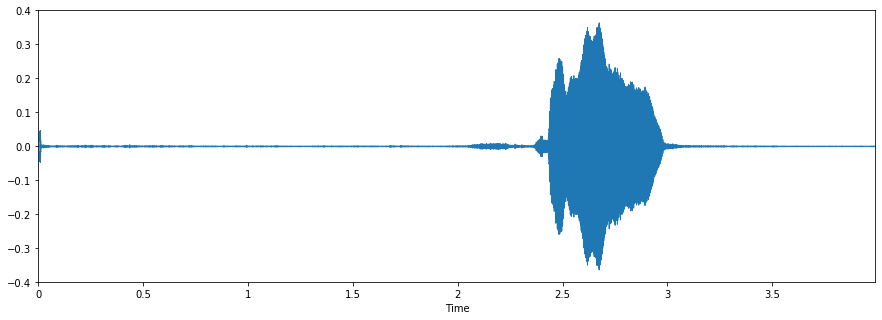

In [16]:
#plot wav with MPL
import librosa
from librosa.display import waveplot
import matplotlib.pyplot as plt

data, sampling_rate = librosa.load('output10.wav')


import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
waveplot(data, sr=sampling_rate)

In [17]:
import numpy as np

#load the recording
X, sample_rate = librosa.load('output10.wav', res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
featurelive = mfccs
#feature column
livedf2 = featurelive

In [18]:
#put it into a pandas df
livedf2= pd.DataFrame(data=livedf2)
livedf2

,0
0,-37.543262
1,-36.223270
2,-36.245003
3,-35.871239
4,-38.073673
...,...
211,-35.644810
212,-35.842564
213,-34.400875
214,-31.698011


In [19]:
#transpose to rows
livedf2 = livedf2.stack().to_frame().T
livedf2

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,-37.543262,-36.22327,-36.245003,-35.871239,-38.073673,-40.100708,-39.356499,-38.694187,-39.351833,-39.131737,...,-32.405003,-30.687704,-32.313004,-33.757202,-34.205036,-35.64481,-35.842564,-34.400875,-31.698011,-29.483974


In [20]:
#expand to 2D
twodim= np.expand_dims(livedf2, axis=2)
twodim

array([[[-37.543262],
        [-36.22327 ],
        [-36.245003],
        [-35.87124 ],
        [-38.073673],
        [-40.100708],
        [-39.3565  ],
        [-38.694187],
        [-39.351833],
        [-39.131737],
        [-39.102863],
        [-39.843513],
        [-39.104904],
        [-39.925926],
        [-39.428406],
        [-39.6392  ],
        [-39.18528 ],
        [-38.769375],
        [-39.712605],
        [-39.668148],
        [-38.57739 ],
        [-38.435497],
        [-39.564865],
        [-38.38411 ],
        [-37.82395 ],
        [-38.428078],
        [-39.171146],
        [-40.820618],
        [-41.609253],
        [-40.501854],
        [-41.512714],
        [-42.627895],
        [-39.706306],
        [-38.72128 ],
        [-38.02601 ],
        [-39.171013],
        [-41.652596],
        [-39.14623 ],
        [-36.26554 ],
        [-36.02379 ],
        [-38.479294],
        [-38.351265],
        [-37.502583],
        [-38.68309 ],
        [-40.706985],
        [-

In [21]:
#load given model
import tensorflow as tf
loaded_model = tf.keras.models.load_model('/Users/srividyaraghavan/Downloads/Emotion_Voice_Detection_Model.h5')

In [22]:
#let pretrained model make prediction on the recording
livepreds = loaded_model.predict(twodim, 
                         batch_size=32, 
                         verbose=1)

1/1 [==============================] - 0s 127ms/step


In [23]:
#show percentages of each feature
livepreds

array([[2.8677279e-01, 4.3642387e-01, 1.6496094e-03, 1.0505365e-01,
        1.7006773e-01, 4.7025169e-15, 5.3485265e-11, 4.1196995e-06,
        3.0802390e-09, 2.8327824e-05]], dtype=float32)

In [24]:
#predicted label
livepreds1=livepreds.argmax(axis=1)
print(livepreds1)

[1]


In [25]:
#normalize - cast to int
liveabc = livepreds1.astype(int).flatten()
print(liveabc)

[1]


In [26]:
#decode each of the 10 labels by assigning the correct string to it
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
str_labels = np.array(["female_angry", "female_calm", "female_fearful", "female_happy", "female_sad", "male_angry", "male_calm", "male_fearful", "male_happy", "male_sad"])
int_labels = lb.fit_transform(str_labels)
print(int_labels)

[0 1 2 3 4 5 6 7 8 9]


In [27]:
#print pred
livepredictions = (lb.inverse_transform((liveabc)))
print(livepredictions)

['female_calm']
